# Лоброторная работа №3 
## Седов Артем Михайлович 
### Вариант №45

## 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
### Масть карты
##### 1 - Черви
##### 2 - Пики
##### 3 - Буби
##### 4 - Крести
###  Ранг карты
##### 1 - Туз
##### 2 - Два
##### .......
##### 12 - Дама
##### 13 - Король
### Покерная комбинация
##### 0: Ничего в руке: нет комбинаций
##### 1: Одна пара: одна пара равных рангов в пределах пяти карт
##### 2: Две пары: две пары равных рангов в пределах пяти карт
##### 3: Сет: три карты равных рангов в пределах пяти карт
##### 4: Стрит: пять карт, последовательно ранжированных без пробелов
##### 5: Флэш: пять карт одной масти
##### 6: Фулл Хаус: пара + сет
##### 7: Каре: четыре карты равных рангов в пределах пяти карт
##### 8: Стрит Флэш: Стрит + Флэш
##### 9: Флэш-Рояль: туз, король, дама, валет, десятка одной масти


## 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  precision_recall_curve, average_precision_score, plot_precision_recall_curve, plot_roc_curve
%matplotlib inline

In [2]:
import pandas as pd
poker_df = pd.read_csv('poker.data.txt')
poker_df.columns = ['Suit_of_card_#1', 'Rank_of_card_#1',
                    'Suit_of_card_#2', 'Rank_of_card_#2',
                    'Suit_of_card_#3', 'Rank_of_card_#3',
                    'Suit_of_card_#4', 'Rank_of_card_#4',
                    'Suit_of_card_#5', 'Rank_of_card_#5', 
                    'Poker_Hand']
poker_df

,Suit_of_card_#1,Rank_of_card_#1,Suit_of_card_#2,Rank_of_card_#2,Suit_of_card_#3,Rank_of_card_#3,Suit_of_card_#4,Rank_of_card_#4,Suit_of_card_#5,Rank_of_card_#5,Poker_Hand
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


In [3]:
print("До удаления дубликатов:    ", poker_df.index.size)
poker_df.drop_duplicates(keep = 'first', inplace = True)
print("После удаления дубликатов: ", poker_df.index.size)

poker_df.dtypes


До удаления дубликатов:     25009
После удаления дубликатов:  25007


Suit_of_card_#1    int64
Rank_of_card_#1    int64
Suit_of_card_#2    int64
Rank_of_card_#2    int64
Suit_of_card_#3    int64
Rank_of_card_#3    int64
Suit_of_card_#4    int64
Rank_of_card_#4    int64
Suit_of_card_#5    int64
Rank_of_card_#5    int64
Poker_Hand         int64
dtype: object

## 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:xlabel='Poker_Hand', ylabel='count'>

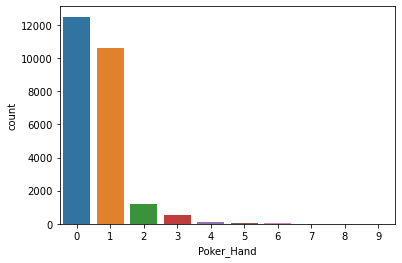

In [4]:
import seaborn
seaborn.countplot(x='Poker_Hand', data=poker_df)

## 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [5]:
from sklearn.preprocessing import MinMaxScaler
Scaling = poker_df.drop('Poker_Hand', axis = 1)
Scaling

,Suit_of_card_#1,Rank_of_card_#1,Suit_of_card_#2,Rank_of_card_#2,Suit_of_card_#3,Rank_of_card_#3,Suit_of_card_#4,Rank_of_card_#4,Suit_of_card_#5,Rank_of_card_#5
0,2,11,2,13,2,10,2,12,2,1
1,3,12,3,11,3,13,3,10,3,1
2,4,10,4,11,4,1,4,13,4,12
3,4,1,4,13,4,12,4,11,4,10
4,1,2,1,4,1,5,1,3,1,6
...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4
25005,4,1,4,10,3,13,3,4,1,10
25006,2,1,2,10,4,4,4,1,4,13
25007,2,12,4,3,1,10,1,12,4,9


BoxPlot до масштабирования:


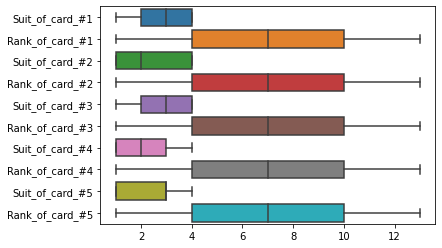

In [6]:
seaborn.boxplot(data = Scaling, orient = 'h')
print('BoxPlot до масштабирования:')

BoxPlot после масштабирования:


<AxesSubplot:>

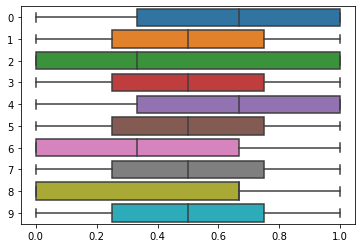

In [7]:
# Выполняем нормализацию данных
scaler = MinMaxScaler()
scaler.fit(Scaling)  #Вычисление минимума и максимума 
Scaling = scaler.transform(Scaling) #Машабирование функции

print('BoxPlot после масштабирования:')
seaborn.boxplot(data = Scaling, orient = 'h')

## 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

## Нет Категореальных признаков 


## 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)


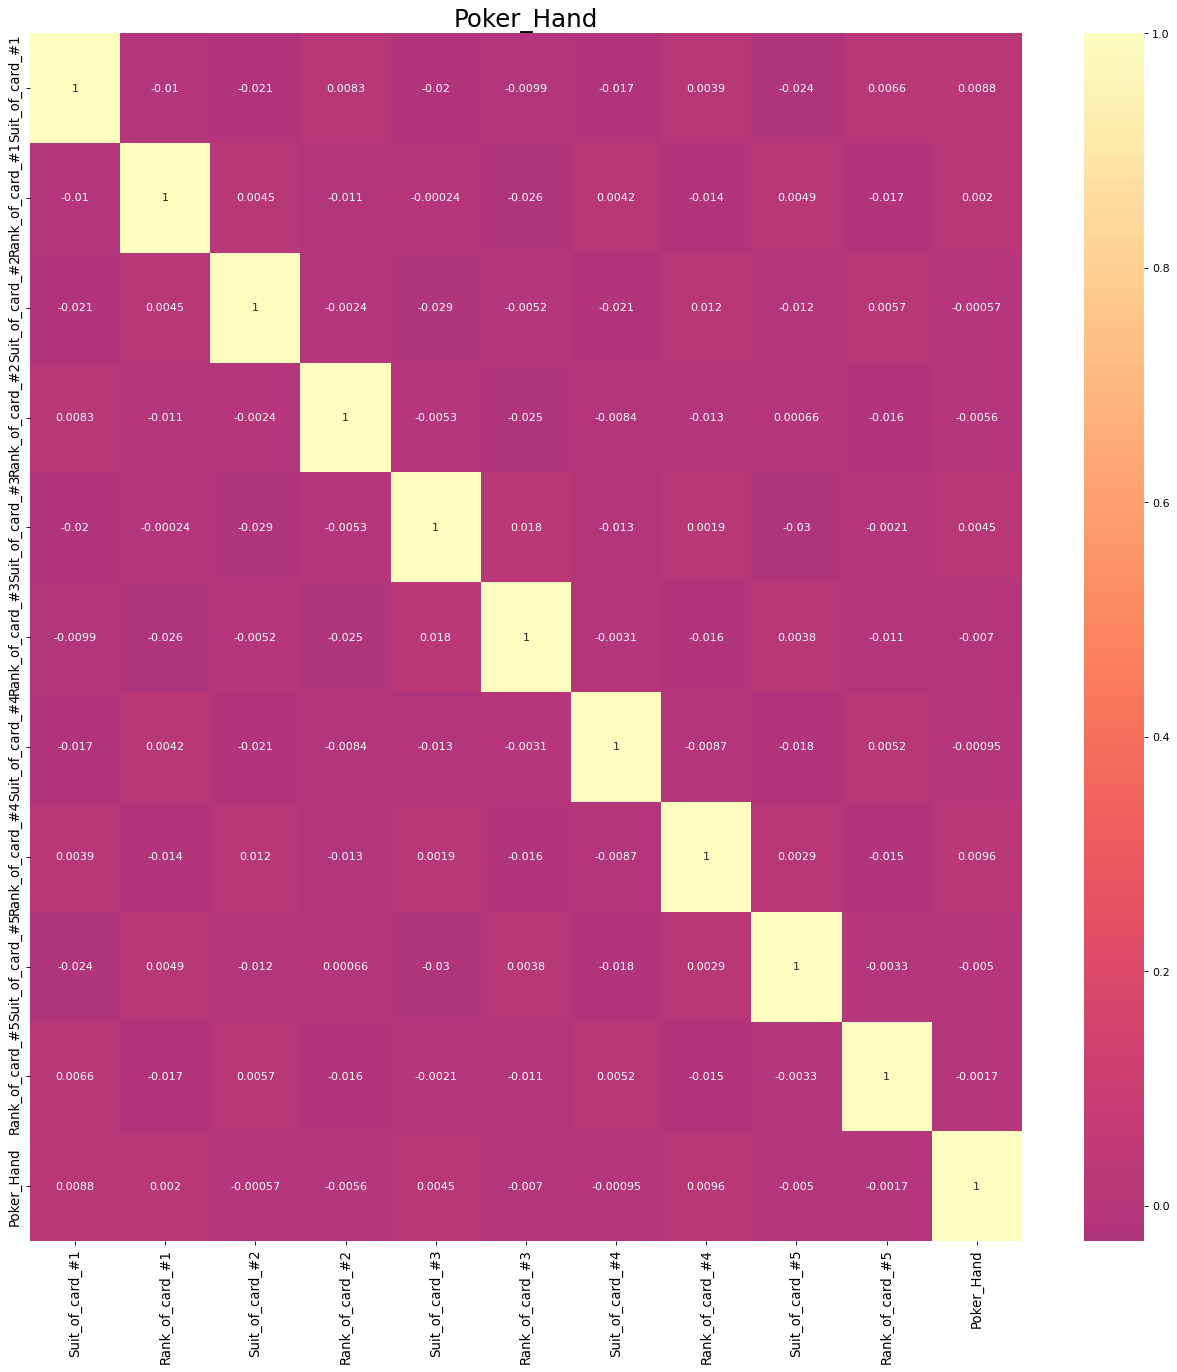

,Suit_of_card_#1,Rank_of_card_#1,Suit_of_card_#2,Rank_of_card_#2,Suit_of_card_#3,Rank_of_card_#3,Suit_of_card_#4,Rank_of_card_#4,Suit_of_card_#5,Rank_of_card_#5,Poker_Hand
Suit_of_card_#1,1.000000,-0.010230,-0.021322,0.008347,-0.019757,-0.009895,-0.017328,0.003920,-0.024211,0.006630,0.008805
Rank_of_card_#1,-0.010230,1.000000,0.004456,-0.010986,-0.000245,-0.026326,0.004152,-0.014413,0.004897,-0.016933,0.001976
Suit_of_card_#2,-0.021322,0.004456,1.000000,-0.002368,-0.029350,-0.005214,-0.021018,0.012123,-0.011914,0.005693,-0.000569
Rank_of_card_#2,0.008347,-0.010986,-0.002368,1.000000,-0.005290,-0.024747,-0.008415,-0.013062,0.000664,-0.016403,-0.005618
Suit_of_card_#3,-0.019757,-0.000245,-0.029350,-0.005290,1.000000,0.018007,-0.013073,0.001922,-0.030366,-0.002057,0.004516
Rank_of_card_#3,-0.009895,-0.026326,-0.005214,-0.024747,0.018007,1.000000,-0.003082,-0.016398,0.003831,-0.010804,-0.006966
Suit_of_card_#4,-0.017328,0.004152,-0.021018,-0.008415,-0.013073,-0.003082,1.000000,-0.008694,-0.018305,0.005180,-0.000950
Rank_of_card_#4,0.003920,-0.014413,0.012123,-0.013062,0.001922,-0.016398,-0.008694,1.000000,0.002860,-0.014653,0.009637
Suit_of_card_#5,-0.024211,0.004897,-0.011914,0.000664,-0.030366,0.003831,-0.018305,0.002860,1.000000,-0.003285,-0.005042
Rank_of_card_#5,0.006630,-0.016933,0.005693,-0.016403,-0.002057,-0.010804,0.005180,-0.014653,-0.003285,1.000000,-0.001695


In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(poker_df.corr(), xticklabels=poker_df.corr().columns, yticklabels=poker_df.corr().columns, cmap='magma', center=0, annot=True)


plt.title('Poker_Hand', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

poker_df.corr()

## 7.	Заполните пропущенные значения в данных


In [9]:
poker_df.isnull().sum()

Suit_of_card_#1    0
Rank_of_card_#1    0
Suit_of_card_#2    0
Rank_of_card_#2    0
Suit_of_card_#3    0
Rank_of_card_#3    0
Suit_of_card_#4    0
Rank_of_card_#4    0
Suit_of_card_#5    0
Rank_of_card_#5    0
Poker_Hand         0
dtype: int64

## 8.	Решите поставленную задачу классификации в соответствии с заданием.

In [20]:
from sklearn.model_selection import train_test_split

x = poker_df1.drop(columns=['Poker_Hand', axis=1]
y = poker_df1['Poker_Hand']


# Делим базу на тестовую выборку и обучающую..
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
  

## Логический классификатор (бинарное решающее дерево).

In [21]:
import numpy as np
import warnings
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
    
warnings.filterwarnings('ignore')

#Создаем классификатор 
dtc = DecisionTreeClassifier()
#Задаем параметры (max_depth(Максимальная глубина дереваб max_features(Число признаков по которым лучшее разбиение ))  
params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (x_train, y_train)

best_features = dtc_grid.best_estimator_.max_features # Находим лучшую глубину
best_depth = dtc_grid.best_estimator_.max_depth       # Находим лучшее количество признаков, которые следует учитывать при поиске

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(x_train, y_train)
#Предсказывем
accuracy_score  = np.mean(y_test == dtc.predict(x_test))
print(' best:', best_score, "\n", 'at features number:', best_features, "\n", 'at depth:', best_depth)
print(' Accuracy dtc: %.5f' % accuracy_score)


 best: 0.5281956991879871 
 at features number: 7 
 at depth: 6
 Accuracy dtc: 0.52653


## Линейный классификатор (персептрон)

In [22]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],        #Константа, которая умножает член регуляризации ()
    'max_iter': [x for x in range(1, 50)],     #Максимальное количество проходов по обучающим данным
}, n_jobs=-1)
search.fit(x_train, y_train)# обучаем
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_ #Средняя перекрестная оценка
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(x_train, y_train)


best: 0.5062560574529725 alpha: 0.05263157894736842 max_iter: 4


Perceptron(alpha=0.05263157894736842, max_iter=4)

## PR график

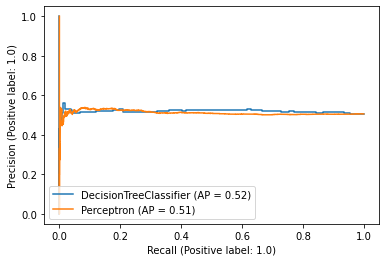

In [24]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
i = plot_precision_recall_curve(dtc, x_test, y_test)
g = plot_precision_recall_curve(ppn, x_test, y_test, ax = i.ax_)

## ROC графики

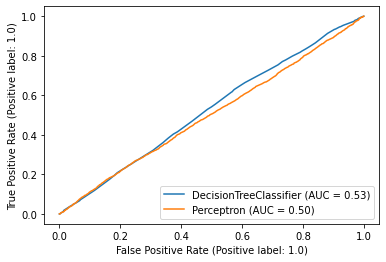

In [25]:
c = plot_roc_curve(dtc, x_test, y_test)
d = plot_roc_curve(ppn, x_test, y_test, ax = c.ax_)


Классификаторы имеют примерно одинаковые показатели качества (около = 0.5) относительно PR и ROC кривых